In [19]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from transformers import BertModel, BertTokenizer
import seaborn as sns
from sentence_transformers.cross_encoder import CrossEncoder

# Contextual embeddings

In [20]:

tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-mpnet-base-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-mpnet-base-v2")
# from transformers import BertModel, BertTokenizer
# model_name = "bert-base-uncased"
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertModel.from_pretrained(model_name)

In [21]:
sentence_a = "I want a recipe with tomato"
sentence_b = "Give me a recipe for a pizza with tomato and cheese"
inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt', add_special_tokens=True, max_length = 512, truncation = True)

input_ids = inputs['input_ids']
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list)
print(tokens)

['<s>', 'i', 'want', 'a', 'recipe', 'with', 'tomato', '</s>', '</s>', 'give', 'me', 'a', 'recipe', 'for', 'a', 'pizza', 'with', 'tomato', 'and', 'cheese', '</s>']


In [22]:
with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True, output_attentions=True)
attention = outputs.attentions
hidden_states = outputs.hidden_states

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


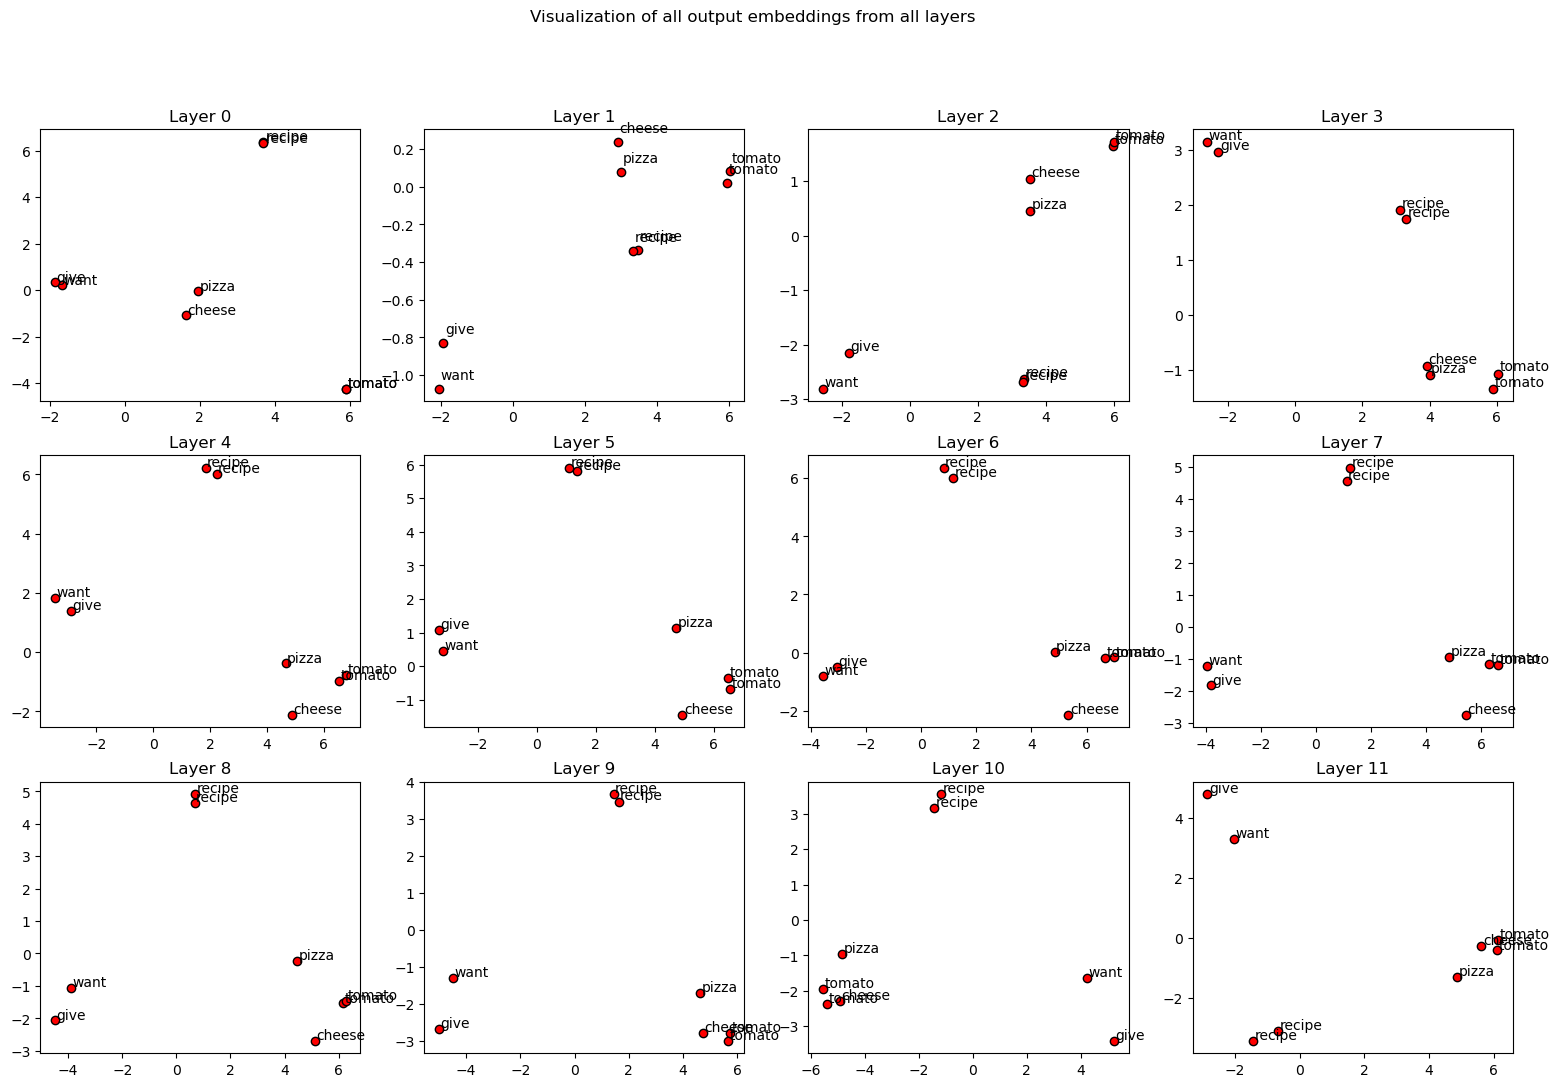

In [23]:


nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))
english_stopwords.add('<s>')
english_stopwords.add('</s>')

layer = 1

rows = 3
cols = 4
fig, ax_full = plt.subplots(rows, cols)
fig.set_figheight(rows*4)
fig.set_figwidth(cols*4+3)
plt.rcParams.update({'font.size': 6})


layer = 0
my_stop_words = {'is', 'the'}
for r in range(rows):
    for c in range(cols):
       
        ax = ax_full[r,c]
        
        plt.rcParams.update({'font.size': 10})
        current_hidden_state = hidden_states[layer][0].detach().numpy()
        
        if current_hidden_state.shape[1] == 2:
            twodim = current_hidden_state
        else:
            twodim = PCA().fit_transform(current_hidden_state)[:,:2]    

        plt.style.use('default') # https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html
      
        for word, (x,y) in zip(tokens, twodim):
            if word.lower() not in english_stopwords:
                im = ax.scatter(x, y, edgecolors='k', c='r')
                ax.text(x+0.05, y+0.05, word)
            
        
        # Show all ticks and label them with the respective list entries
        ax.set_title("Layer " + str(layer))
            
        # Loop over data dimensions and create text annotations.
        layer = layer + 1

fig.suptitle("Visualization of all output embeddings from all layers")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


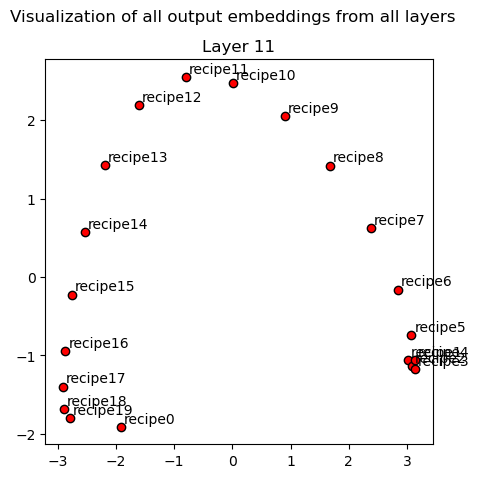

In [46]:

sentence_a = "recipe "*20
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_hidden_states=True, output_attentions=True)
inputs = tokenizer.encode_plus(sentence_a, return_tensors='pt', add_special_tokens=False, max_length = 512, truncation = True)

input_ids = inputs['input_ids']
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list)

with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True, output_attentions=True)
attention = outputs.attentions
hidden_states = outputs.hidden_states

nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))
english_stopwords.add('<s>')
english_stopwords.add('</s>')

layer = 11

rows = 3
cols = 4
fig, ax_full = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(5)
plt.rcParams.update({'font.size': 6})
     
ax = ax_full
plt.rcParams.update({'font.size': 10})
current_hidden_state = hidden_states[layer][0].detach().numpy()

if current_hidden_state.shape[1] == 2:
    twodim = current_hidden_state
else:
    twodim = PCA().fit_transform(hidden_states[layer][0].detach().numpy())[:,:2]    
    
plt.style.use('default')
count = 0
for word, (x,y) in zip(tokens, twodim):
    if word.lower() not in english_stopwords:
        im = ax.scatter(x, y, edgecolors='k', c='r')
        ax.text(x+0.05, y+0.05, word +str(count))
        count += 1
    

# Show all ticks and label them with the respective list entries
ax.set_title("Layer " + str(layer))
fig.suptitle("Visualization of all output embeddings from all layers")
plt.show()

In [25]:
import sys
!test -d bertviz_repo && echo "FYI: bertviz_repo directory already exists, to pull latest version uncomment this line: !rm -r bertviz_repo"
# !rm -r bertviz_repo # Uncomment if you need a clean pull from repo
!test -d bertviz_repo || git clone https://github.com/jessevig/bertviz bertviz_repo
if not 'bertviz_repo' in sys.path:
  sys.path += ['bertviz_repo']


from bertviz import model_view, head_view

fatal: destination path 'bertviz_repo' already exists and is not an empty directory.


# Positional Embeddings

Some weights of RobertaModel were not initialized from the model checkpoint at deepset/roberta-base-squad2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


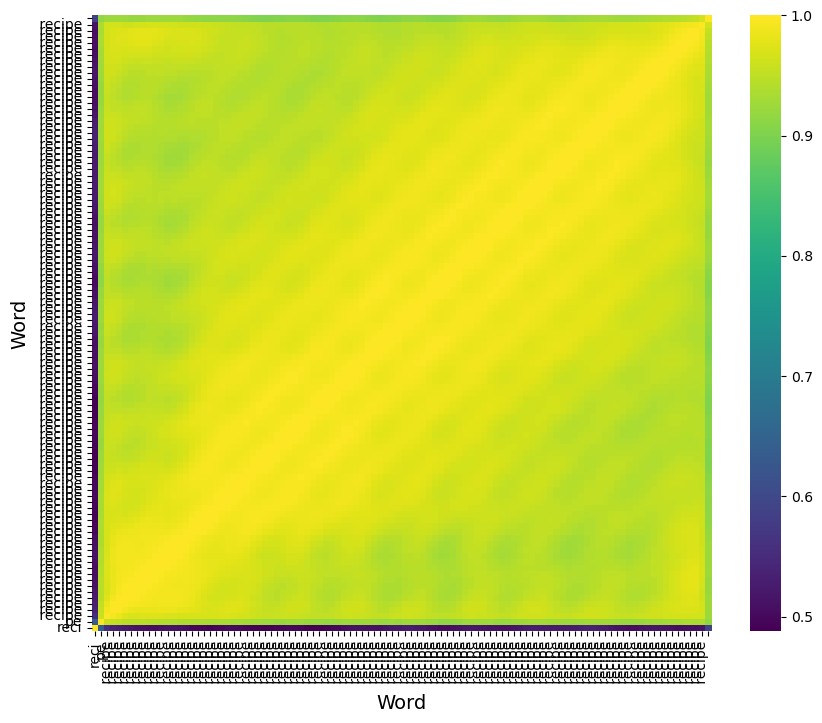

In [62]:


# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_hidden_states=True, output_attentions=True)

# tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-mpnet-base-v2")
# model = AutoModel.from_pretrained("sentence-transformers/all-mpnet-base-v2", output_hidden_states=True, output_attentions=True)
# Choose a token to visualize its positional embeddings
token = "recipe "*50
token_ids = tokenizer.encode(token, add_special_tokens=False, return_tensors="pt")[0]
# Prepare input for the model
input_ids = token_ids.unsqueeze(0)  # Add batch dimension

# Get positional embeddings from the BERT model
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs.hidden_states[12][0].numpy()  # shape: (seq_len, hidden_dim)

# Compute cosine similarity between word embeddings
similarity_matrix = cosine_similarity(embeddings)

# Prepare words for y-axis
words = [tokenizer.decode([id]) for id in token_ids]

# Plot similarity matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(similarity_matrix, cmap="viridis", yticklabels=words, xticklabels=words)
ax.invert_yaxis()
plt.xlabel("Word", fontsize=14)
plt.ylabel("Word", fontsize=14)
#plt.title(f"Similarity Matrix for token '{token}'", fontsize=16)
plt.show()


In [27]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

Some weights of RobertaModel were not initialized from the model checkpoint at deepset/roberta-base-squad2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


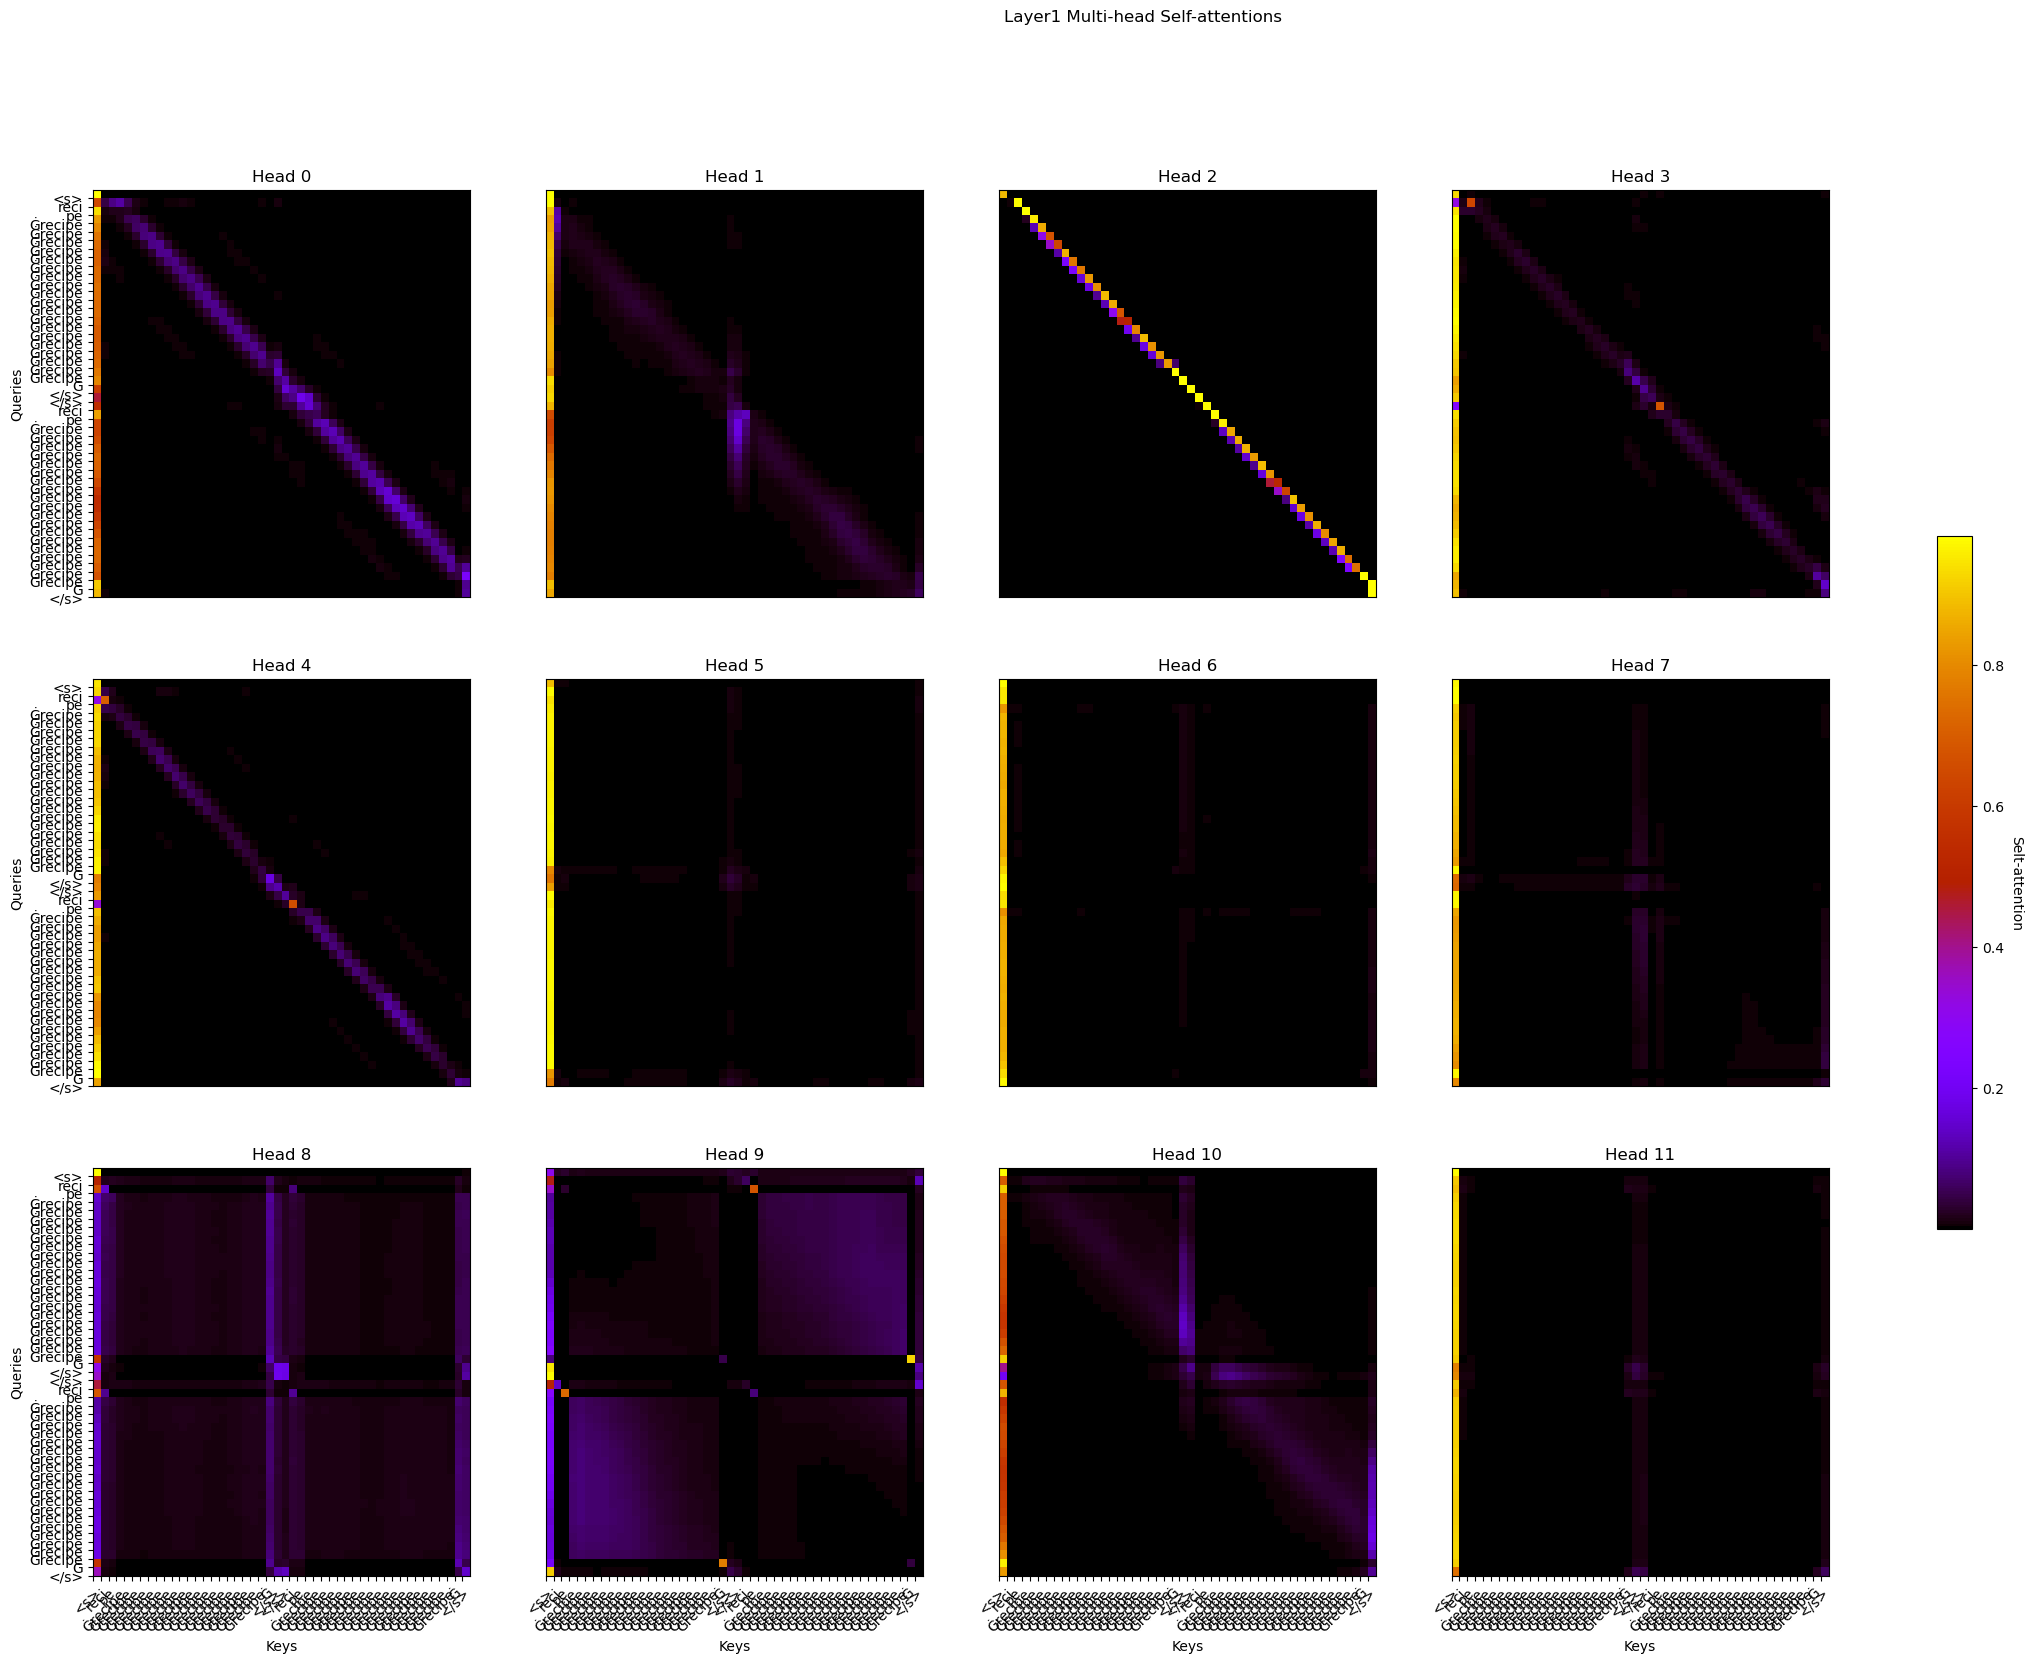

In [28]:
model_path = 'deepset/roberta-base-squad2'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path)

sentence_a = "recipe "*20
sentence_b = "recipe "*20
inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt', add_special_tokens=True, max_length = 512, truncation = True)

input_ids = inputs['input_ids']
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list)

with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True, output_attentions=True)

attention = outputs.attentions
hidden_states = outputs.hidden_states


layer = 1

rows = 3
cols = 4
fig, ax_full = plt.subplots(rows, cols)
fig.set_figheight(rows*6)
fig.set_figwidth(cols*6+4)
plt.rcParams.update({'font.size': 10})

j = 0
for r in range(rows):
    for c in range(cols):
       
        ax = ax_full[r,c]
        
        sattention = attention[layer][0][j].numpy()
        sattention = np.flip(sattention, 0)
        
        plt.rcParams.update({'font.size': 10})

        im = ax.pcolormesh(sattention, cmap='gnuplot')

        # Show all ticks and label them with the respective list entries
        ax.set_title("Head " + str(j))
        ax.set_yticks(np.arange(len(tokens)))
        if c == 0:
            ax.set_yticklabels(reversed(tokens))
            ax.set_ylabel("Queries")
        else:
            ax.set_yticks([])

        ax.set_xticks(np.arange(len(tokens)))
        if r == rows-1:
            ax.set_xticklabels(tokens)
            ax.set_xlabel("Keys")
            
            # Rotate the tick labels and set their alignment.
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                     rotation_mode="anchor")
        else:
            ax.set_xticks([])

            
        # Loop over data dimensions and create text annotations.
        j = j + 1

fig.suptitle("Layer" + str(layer) + " Multi-head Self-attentions")
cbar = fig.colorbar(im, ax=ax_full, location='right', shrink=0.5)
cbar.ax.set_ylabel("Selt-attention", rotation=-90, va="bottom")
plt.show()


Some weights of RobertaModel were not initialized from the model checkpoint at deepset/roberta-base-squad2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


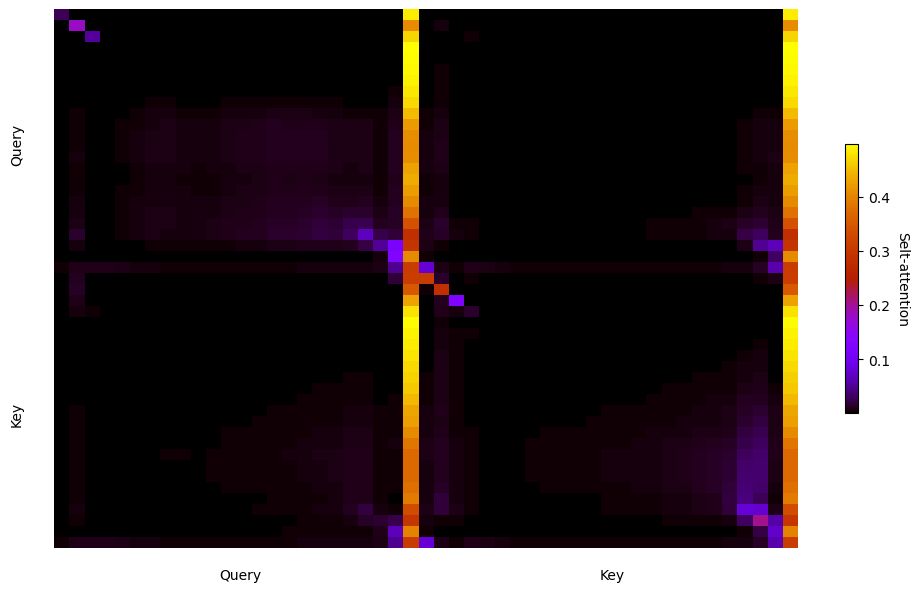

In [42]:
model_path = 'deepset/roberta-base-squad2'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path)

sentence_a = "recipe "*20
sentence_b = "ingredient "*20
inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt', add_special_tokens=True, max_length = 512, truncation = True)

input_ids = inputs['input_ids']
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list)

with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True, output_attentions=True)

attention = outputs.attentions
hidden_states = outputs.hidden_states

layer = 11

rows = 3
cols = 4
fig, ax_full = plt.subplots(1, 1)
fig.set_figheight(7)
fig.set_figwidth(12)
plt.rcParams.update({'font.size': 10})

j = 2

ax = ax_full

sattention = attention[layer][0][j].numpy()
sattention = np.flip(sattention, 0)

plt.rcParams.update({'font.size': 10})

im = ax.pcolormesh(sattention, cmap='gnuplot')

# Show all ticks and label them with the respective list entries
# ax.set_title("Head " + str(j))
ax.set_yticks(np.arange(len(tokens)))
# if c == 0:
ax.set_yticklabels(reversed(tokens))
ax.set_ylabel("Query")
# else:
#     ax.set_yticks([])

ax.set_xticks(np.arange(len(tokens)))
# # if r == rows-1:
ax.set_xticklabels(tokens)
ax.set_xlabel("Key")
ax.axis('off')
ax.text(0.25, -0.05, 'Query', ha='center', va='center', transform=ax.transAxes)
ax.text(0.75, -0.05, 'Key', ha='center', va='center', transform=ax.transAxes)
ax.text(-0.05, 0.25, 'Key', ha='center', va='center', transform=ax.transAxes, rotation='vertical')
ax.text(-0.05, 0.75, 'Query', ha='center', va='center', transform=ax.transAxes, rotation='vertical')
# # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
# else:
#     ax.set_xticks([])

    

# fig.suptitle("Layer" + str(layer) + " Multi-head Self-attentions")
cbar = fig.colorbar(im, ax=ax_full, location='right', shrink=0.5)
cbar.ax.set_ylabel("Selt-attention", rotation=-90, va="bottom")
plt.show()


Some weights of RobertaModel were not initialized from the model checkpoint at deepset/roberta-base-squad2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


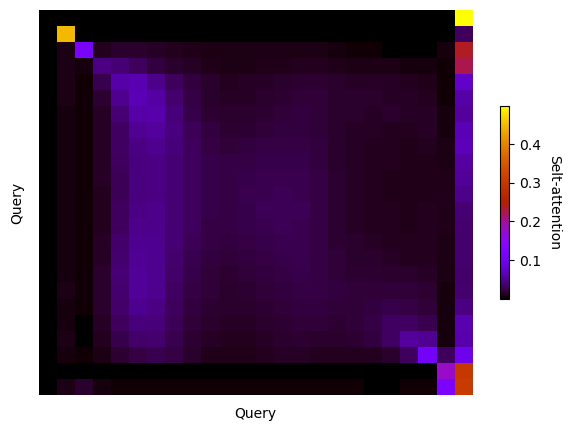

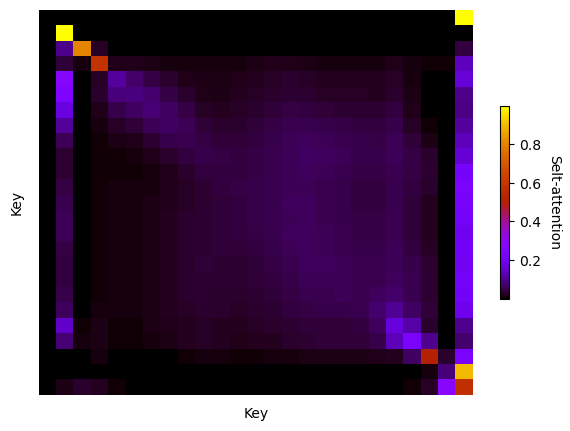

In [30]:

model_path = 'deepset/roberta-base-squad2'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path)

sentence_a = "recipe " * 20
sentence_b = "ingredient " * 20

input_a = tokenizer.encode_plus(sentence_a, return_tensors='pt', add_special_tokens=True, max_length=512, truncation=True)
input_b = tokenizer.encode_plus(sentence_b, return_tensors='pt', add_special_tokens=True, max_length=512, truncation=True)

input_ids = input_a['input_ids']
input_id_list = input_ids[0].tolist() # Batch index 0
tokens_a = tokenizer.convert_ids_to_tokens(input_id_list)

input_ids = input_b['input_ids']
input_id_list = input_ids[0].tolist() # Batch index 0
tokens_b = tokenizer.convert_ids_to_tokens(input_id_list)
with torch.no_grad():
    output_a = model(**input_a, output_hidden_states=True, output_attentions=True)
    output_b = model(**input_b, output_hidden_states=True, output_attentions=True)

attention_a = output_a.attentions
hidden_states_a = output_a.hidden_states
attention_b = output_b.attentions
hidden_states_b = output_b.hidden_states

layer = 11
j = 9
rows = 3
cols = 4
fig, ax_full = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(7)
plt.rcParams.update({'font.size': 10})
ax = ax_full
ax.set_xlabel("Key")
ax.set_ylabel("Query")
cbar = fig.colorbar(im, ax=ax_full, location='right', shrink=0.5)
cbar.ax.set_ylabel("Selt-attention", rotation=-90, va="bottom")
ax.axis('off')
ax.text(0.5, -0.05, 'Query', ha='center', va='center', transform=ax.transAxes)
ax.text(-0.05, 0.5, 'Query', ha='center', va='center', transform=ax.transAxes, rotation='vertical')
# ax.set_xticks(np.arange(len(tokens_a)))
# ax.set_xticklabels(tokens_a)
# ax.set_yticks(np.arange(len(tokens_a)))
# ax.set_yticklabels(reversed(tokens_a))
sattention = attention_a[layer][0][j].numpy()
sattention = np.flip(sattention, 0)
plt.rcParams.update({'font.size': 10})
im = ax.pcolormesh(sattention, cmap='gnuplot')





fig, ax_full = plt.subplots(1, 1)


fig.set_figheight(5)
fig.set_figwidth(7)
plt.rcParams.update({'font.size': 10})
ax = ax_full
ax.set_xlabel("Key")
ax.set_ylabel("Query")
ax.axis('off')
ax.text(0.5, -0.05, 'Key', ha='center', va='center', transform=ax.transAxes)
ax.text(-0.05, 0.5, 'Key', ha='center', va='center', transform=ax.transAxes, rotation='vertical')
cbar = fig.colorbar(im, ax=ax_full, location='right', shrink=0.5)
cbar.ax.set_ylabel("Selt-attention", rotation=-90, va="bottom")
# ax.set_xticks(np.arange(len(tokens_b)))
# ax.set_xticklabels(tokens_b)
# ax.set_yticks(np.arange(len(tokens_b)))
# ax.set_yticklabels(reversed(tokens_b))
sattention = attention_b[layer][0][j].numpy()
sattention = np.flip(sattention, 0)

plt.rcParams.update({'font.size': 10})

im = ax.pcolormesh(sattention, cmap='gnuplot')

# Rest of the plotting code remains the same...


# Self-Attention

### Cross encoder

In [31]:
# # From transformers.

# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# from transformers import pipeline
# import torch

# # cross-encoder/ms-marco-MiniLM-L-12-v2
# model = AutoModelForSequenceClassification.from_pretrained('cross-encoder/ms-marco-MiniLM-L-12-v2')
# tokenizer = AutoTokenizer.from_pretrained('cross-encoder/ms-marco-MiniLM-L-12-v2')

# pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)


# pipe([{"text": "How to make pasta?", "text_pair": "How much does 1KG of pasta costs?"}])

In [32]:
# from sentence_transformers import CrossEncoder

# model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-12-v2", max_length=512)
# scores = model.predict(
#     [("Query1", "Paragraph1"), ("Query", "Paragraph2"), ("Query", "Paragraph3")]
# )

# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# import torch

# model = AutoModelForSequenceClassification.from_pretrained("cross-encoder/ms-marco-MiniLM-L-12-v2")
# tokenizer = AutoTokenizer.from_pretrained("cross-encoder/ms-marco-MiniLM-L-12-v2")

# features = tokenizer(["Query", "Query"], ["Paragraph1", "Paragraph2"], padding=True, truncation=True, return_tensors="pt")

# model.eval()
# with torch.no_grad():
#     scores = model(**features).logits
#     print(scores)

### Dual encoder

In [33]:
# # tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/msmarco-distilbert-base-v2")
# # model = AutoModel.from_pretrained("sentence-transformers/msmarco-distilbert-base-v2")

# sentence_a = "How to make pasta?"
# sentence_b = "How much 1KG of pasta costs?"

# input_a = tokenizer(sentence_a, return_tensors="pt")
# input_b = tokenizer(sentence_b, return_tensors="pt")

# with torch.no_grad():
#     scores_a = model(**input_a)
#     scores_b = model(**input_b)

# similarity_score = cosine_similarity(scores_a.logits, scores_b.logits)

# print(similarity_score.item())

In [34]:
# import torch#pytorch
# from transformers import AutoTokenizer, AutoModel#for embeddings
# from sklearn.metrics.pairwise import cosine_similarity#for similarity

# #download pretrained model
# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased",)
# model = AutoModel.from_pretrained("bert-base-uncased",output_hidden_states=True)

# #create embeddings
# def get_embeddings(text,token_length):
#   tokens=tokenizer(text,max_length=token_length,padding='max_length',truncation=True)
#   with torch.no_grad():
#     output=model(torch.tensor(tokens.input_ids).unsqueeze(0),
#                attention_mask=torch.tensor(tokens.attention_mask).unsqueeze(0)).hidden_states[-1]
#   return torch.mean(output,axis=1).detach().numpy()

# #calculate similarity
# def calculate_similarity(text1,text2,token_length=20):
#     out1=get_embeddings(text1,token_length=token_length)#create embeddings of text
#     out2=get_embeddings(text2,token_length=token_length)#create embeddings of text
#     sim1= cosine_similarity(out1,out2)[0][0]
#     print(f'Similarity between text1 and text2 is {sim1}')
    
# text1='How to make pasta?'
# text2='How much 1KG of pasta costs?'

# calculate_similarity(text1,text2)

O contexto de cada frase separada é calculada em cada embedding. Depois apenas comparamos os embeddings. Neste caso o similarity score é maior no dual encoding porque ele não tem em conta o contexto "misturado" quando fez o embedding de ambas as frases. Quando fazemos o cross encoder aí os embeddings são calculados de acordo com o contexto das duas frases entre elas. Assim os core dá ligeiramente pior e faz sentido porque apesar de falarem em massa o contexto é diferente e o cross encoder consegue captar esse contexto de melhor forma relativamente ao dual encoder.

# Dual Encoder

Some weights of RobertaModel were not initialized from the model checkpoint at cross-encoder/stsb-distilroberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Similarity between text1 and text2 is 0.723459005355835


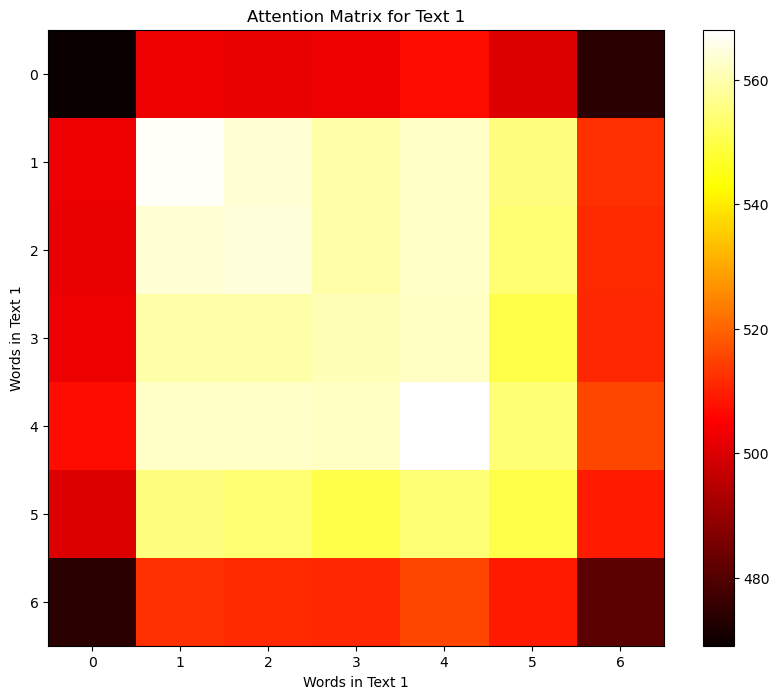

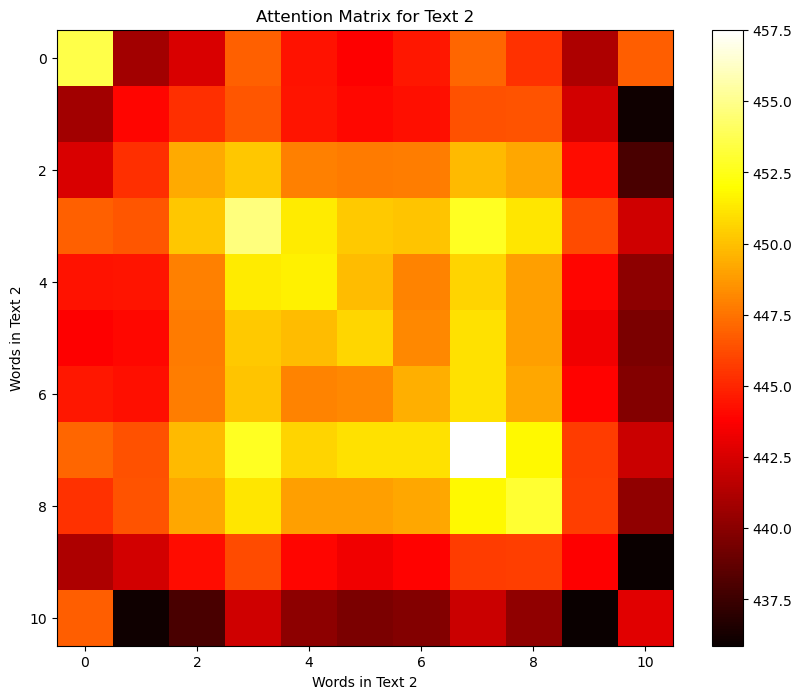

In [35]:

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("cross-encoder/stsb-distilroberta-base")
model = AutoModel.from_pretrained("cross-encoder/stsb-distilroberta-base", output_hidden_states=True)

# Define your texts
text1 = 'How to make pasta?'
text2 = 'How much 1KG of pasta costs?'

# Tokenize the texts
inputs1 = tokenizer(text1, return_tensors="pt", max_length=128, truncation=True, padding=True)
inputs2 = tokenizer(text2, return_tensors="pt", max_length=128, truncation=True, padding=True)
# Forward pass through the model
with torch.no_grad():
    outputs1 = model(**inputs1)
    outputs2 = model(**inputs2)

# Get the last layer hidden states
hidden_states1 = outputs1.hidden_states[-1]
hidden_states2 = outputs2.hidden_states[-1]

# Calculate the mean of the hidden states
mean_hidden_states1 = torch.mean(hidden_states1, dim=1)
mean_hidden_states2 = torch.mean(hidden_states2, dim=1)

# Calculate similarity
similarity = cosine_similarity(mean_hidden_states1, mean_hidden_states2)

print(f"Similarity between text1 and text2 is {similarity.item()}")

import matplotlib.pyplot as plt

# Extract the attention weights
attn_weights1 = torch.matmul(hidden_states1, hidden_states1.transpose(-1, -2))
attn_weights2 = torch.matmul(hidden_states2, hidden_states2.transpose(-1, -2))

# Plot the attention matrix for text1
plt.figure(figsize=(10, 8))
plt.imshow(attn_weights1.squeeze().cpu().numpy(), cmap='hot', interpolation='nearest')
plt.title('Attention Matrix for Text 1')
plt.xlabel('Words in Text 1')
plt.ylabel('Words in Text 1')
plt.colorbar()
plt.show()

# Plot the attention matrix for text2
plt.figure(figsize=(10, 8))
plt.imshow(attn_weights2.squeeze().cpu().numpy(), cmap='hot', interpolation='nearest')
plt.title('Attention Matrix for Text 2')
plt.xlabel('Words in Text 2')
plt.ylabel('Words in Text 2')
plt.colorbar()
plt.show()


# Cross Encoder

In [36]:
"""
This example computes the score between a query and all possible
sentences in a corpus using a Cross-Encoder for semantic textual similarity (STS).
It output then the most similar sentences for the given query.
"""


# Pre-trained cross encoder
model = CrossEncoder("cross-encoder/stsb-distilroberta-base")

# We want to compute the similarity between the query sentence
query = "How much 1KG of pasta costs?"

# With all sentences in the corpus
corpus = [
    "How to make pasta?",
    "How to make pizza?",
    "What is the price of pasta per KG?",
]

# 1. We rank all sentences in the corpus for the query
ranks = model.rank(query, corpus)

# Print the scores
print("Query:", query)
for rank in ranks:
    print(f"{rank['score']:.2f}\t{corpus[rank['corpus_id']]}")

# 2. Alternatively, you can also manually compute the score between two sentences
sentence_combinations = [[query, sentence] for sentence in corpus]
scores = model.predict(sentence_combinations)

# Sort the scores in decreasing order to get the corpus indices
ranked_indices = np.argsort(scores)[::-1]
print("scores:", scores)
print("indices:", ranked_indices)

Query: How much 1KG of pasta costs?
0.82	What is the price of pasta per KG?
0.36	How to make pasta?
0.03	How to make pizza?
scores: [0.35502282 0.02596632 0.8238161 ]
indices: [2 0 1]
